###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2020 David Burris and Adam Wickenheiser

# Introductory Statistics

In this notebook, we'll look at how to calculate the familiar central tendencies, like mean, median, and mode, of a set of data.

## Learning objectives:

1. To be able to calculate the mean, median, mode, and standard deviation of a set of data
1. To be able to calculate z-scores and percentiles using the normal distribution

## Contents:

1. [Calculating mean, median, and mode](#mean)
1. [Calculating standard deviation](#stddev)
1. [Standard deviations and percentiles using the normal distribution](#norm)

<a id='mean'></a>

### Calculating mean, median, and mode

Let's verify the formula for the mean of a set of data:

$\bar{X} = \dfrac{1}{n}\sum\limits_{i=1}^n X_i$

We will compare this formula to the library function [numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html).

First let's import the libraries we will need for this lesson.  We'll use [numpy](https://numpy.org/doc/stable/index.html) for math functions, [matplotlib.pyplot](https://matplotlib.org/2.0.2/index.html) for plotting, and [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) for statistical functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

We'll start off with a fixed set of data.  To compute the mean using the formula above, we first compute the sum of all of the data, then divide by the number of data points, which is the [size](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.size.html?highlight=size#numpy.ndarray.size) of the data array.

In [2]:
# compute the mean using the formula
x = np.array([1, 2, 3, 4, 3, 2, 3, 4, 3, 2, 2, 1, 3, 2])  # data array
x_mean = np.sum(x)/x.size   # sum of the data set divided by the size of the data set

print('Mean calculated using formula =',x_mean)

# compute the mean using the library function
x_mean = np.mean(x)

print('Mean calculated using library function =',x_mean)

Mean calculated using formula = 2.5
Mean calculated using library function = 2.5


You may also want to calculate the median and mode of this set of data.  While there are formulas for calculating these values, we'll just use the library functions.

In [3]:
# compute the median using the library function
x_median = np.median(x)

print('Median calculated using library function =',x_median)

# compute the mode using the library function
x_mode, ind_mode = stats.mode(x)

print('Mode calculated using library function =',x_mode)
print('Number of occurances of mode values =',ind_mode)

Median calculated using library function = 2.5
Mode calculated using library function = [2]
Number of occurances of mode values = [5]


Note that the [mode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) function is found in the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).  It returns the most frequent values *and* the number of occurances.  So in this example, the mode is 2 and it occurs 5 times in the data array.

<a id='stddev'></a>

### Calculating standard deviation

Let's verify the formula for the standard deviation of a set of data:

$s_X = \sqrt{\dfrac{1}{n-1}\sum\limits_{i=1}^n (\bar{X} - X_i)^2}$

We will compare this formula to the library function [numpy.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html).

In [4]:
# compute the standard deviation using the formula
x_std = np.sqrt(np.sum((x_mean-x)**2)/(x.size-1))

print('Standard deviation calculated using formula =',x_std)

# compute the standard deviation using the library function
x_std = np.std(x,ddof=1)

print('Standard deviation calculated using library function =',x_std)

Standard deviation calculated using formula = 0.9405399431259602
Standard deviation calculated using library function = 0.9405399431259602


Note that when using the library function [numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html), we use the additional input argument `ddof=1`.  This is because the default formula for standard deviation is

$s_X = \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^n (\bar{X} - X_i)^2}$

Notice the difference in the denominator from what we saw above.  The `ddof=1` puts that $-1$ in the denominator so the results match up.

<a id='norm'></a>

### Standard deviations and percentiles using the normal distribution

Let's say the average on a standardized text is 1150 and you score a 1200.  We know this is 50 points higher than the average, but is this cause enough to celebrate?  We need to know how much the scores are distributed or "scattered" to be able to judge if this is a significant improvement over the average.

The [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution) is an important probability distribution for many reasons, some of which are covered in other lessons.  Its familiar "bell curve" shape is a good approximation to many things that are measured in practice.

Let's look at a few features of the normal distribution from GACTI and show how to compute them in Python.

<img src="images/normal distribution.png" width="700" />

If we are within one standard deviation of the mean, written as $\pm 1 \sigma$, this figure shows that 68.26% of the scores from the total population of test takers are also in this range ($0.3413 \times 2 = 0.6826$).  These numbers were found from the row labeled "Probability of Cases in portions of the curve".  Another way to look at it is that 68.26% of the area under the bell curve is in the band $\pm 1 \sigma$ around the mean.

Now, let's calculate this in Python.  To calculate the area under the curve, we will use the cumulative distribution function, which is just the integral of the bell curve, which is the probability distribution function.  Let's first plot these two functions so you can see what they look like in Python.

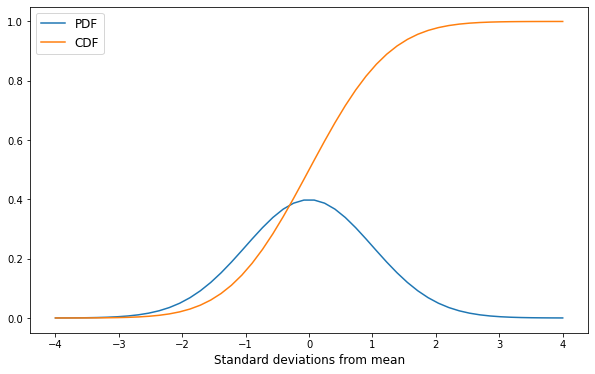

In [5]:
x = np.linspace(-4,4)      # let's plot over the range -4 to +4 standard deviations

y1 = stats.norm.pdf(x)     # compute the PDF at each value of x
y2 = stats.norm.cdf(x)     # compute the CDF at each value of x

plt.figure(figsize=(10,6))
plt.plot(x,y1,label='PDF')      # plot the PDF
plt.plot(x,y2,label='CDF')      # plot the CDF
plt.xlabel('Standard deviations from mean',size=12)     # the size argument is the font size
plt.legend(fontsize=12);

You can see here that the CDF converges to 1, indicating that the total area under the PDF is 1. (One way to think about this is that there is a 100% probability of being within some number of standard deviations of the mean!)

We just want the probability of being within 1 standard deviation.  To get this, we use Calculus:

$\int\limits_{-1}^1 f(x)dx = F(1) - F(-1)$

where $f(x)$ is the PDF and $F(x)$ is the CDF.  Looks complicated, but we only need the right side of this equation, which is simple to implement in Python:

In [6]:
min_range = -1.0
max_range = 1.0

prob = stats.norm.cdf(max_range) - stats.norm.cdf(min_range)

print('The probability of being between',min_range,'and',max_range,'standard deviations is',prob*100,'%')

The probability of being between -1.0 and 1.0 standard deviations is 68.26894921370858 %


This result matches what we read off of the figure.

Let's try the same thing with a different range:

In [7]:
min_range = -0.5
max_range = 1.5

prob = stats.norm.cdf(max_range) - stats.norm.cdf(min_range)

print('The probability of being between',min_range,'and',max_range,'standard deviations is',prob*100,'%')

The probability of being between -0.5 and 1.5 standard deviations is 62.4655260005155 %


Let's plot this probability so you can visualize the calculation that goes into it.

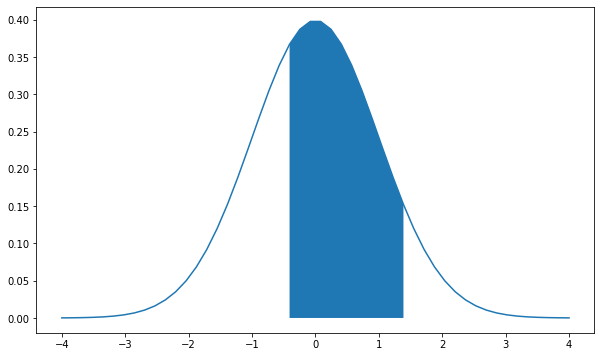

In [8]:
plt.figure(figsize=(10,6))
plt.plot(x,y1,label='PDF')      # plot the PDF
plt.fill_between(x,y1,where=((x>=min_range) & (x <=max_range)));

The area of the shaded blue region between $-0.5\sigma$ and $1.5 \sigma$ is 0.6247 as calculated above.

Let's say we want to design the height of a doorway, based on the population's mean height of 70 inches with a standard deviation of 4 inches.  How high should we design the doorway so that 99.9% of the population fits under the doorway without having to duck?

Basically, we need to find the spot on the CDF where it reaches 0.999 (note that this function never reaches 1 exactly).  The following figure provides the solution:

<img src="https://github.com/AdaWick/CDS/blob/master/Data%20Analysis/images/normal%20distribution.png?raw=true" width="700" />

You can see that 99.9% Cumulative % lies at $+3 \sigma$, so we need to design the doorway to be the mean height plus three standard deviations.  Answer: $70 + 3(4) = 82$ inches.

$+3$ is also called the **z-score** which is just another name for the number of standard deviations with respect to the mean

How do we calculate this in Python?

The height of the door should be 82.36092922467138 inches to achieve a 99.9 % percentile


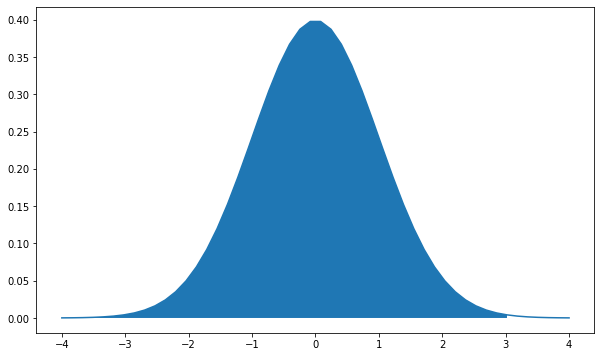

In [9]:
pop_mean = 70        # population mean [in]
pop_std = 4          # population standard deviation [in]
perc = 99.9          # percentile

z = stats.norm.ppf(perc/100)     # z-score for 99.9% = 0.999

door_height = pop_mean + z*pop_std   # design door height for this z-score

print('The height of the door should be',door_height,'inches to achieve a',perc,'% percentile')

plt.figure(figsize=(10,6))
plt.plot(x,y1,label='PDF')      # plot the PDF
plt.fill_between(x,y1,where=(x <= z));

The shaded region is only missing the part above $x=3$, which represents the 0.1% of the population who will have to duck!

Here's a different type of problem:

If the standard doorway is 80 inches, what percentage of the population can walk underneath without having to duck?

To answer this, we check the value of the CDF at the z-score corresponding to this height.

By definition, a value of a variable $X$ with a z-score of $z$ is given by

$X = \mu + z \sigma$

where $\mu$ is the mean and $\sigma$ is the standard deviation.  So, solving for $z$ gives

$z = \dfrac{X - \mu}{\sigma}$

In [10]:
X = 80                            # specific value of height we want to check [in]
z = (X - pop_mean)/pop_std        # z-score of the value of X

perc = 100*stats.norm.cdf(z)      # percentile corresponding to this z-score

print('The percentage of the population that can fit under a doorway of height',X,'inches is',perc,'%')

The percentage of the population that can fit under a doorway of height 80 inches is 99.37903346742239 %
